# Balanço Material em Estado Transiente

## Apresentação

Este notebook demonstra a aplicação das equações gerais de balanço material para uma variedade de problemas.

## Balanço Material em Estado Transiente

O princípio geral dos balanços materiais é expresso em palavras como

Acumulo = Entrada - Saída + Geração - Consumo

Uma equação como essa pode ser escrita para qualquer quantidade conservada, sejam espécies químicas com as quais os engenheiros químicos ou bioengenheiros trabalham, dinheiro no caso de finanças ou populações para cientistas sociais. Sempre que os termos do lado direito da equação não produzem um resultado zero, ficamos com um equilíbrio _instável_, que são alguns dos problemas mais fascinantes e desafiadores na prática da engenharia.

## Exemplo 1: Crescimento Populacional

O primeiro exemplo diz respeito ao crescimento populacional. Observando as taxas de natalidade e mortalidade em vários países do globo, deparamo-nos com os seguintes dados mantidos pelo Banco Mundial.

Para o Afeganistão (o primeiro país nos gráficos do Banco Mundial), a população de 2019 foi estimada em 31.802.480 com uma [taxa de natalidade de 17,888 nascimentos por ano por 1.000 pessoas](http://data.worldbank.org/indicator/SP.DYN.CBRT.IN) e uma [taxa de mortalidade de 7,524 por ano por 1.000](http://data.worldbank.org/indicator/SP.DYN.CDRT.IN). Supondo que não haja imigração ou emigração, podemos prever a população em 2022?

### Equação de balanço populacional


Escrevendo a equação de balanço, temos

$\underbrace{\mbox{Acumulo}}_{\frac{dP}{dt}} = \underbrace{\mbox{Entrada}}_{=0} - \underbrace{\mbox{Saida}}_{=0} + \underbrace{\mbox{Generacao}}_{nascimento=\frac{17.888}{1000}P} - \underbrace{\mbox{Consumo}}_{morte=\frac{7.524}{1000}P}$

A combinação algébrica dos dois termos na direita resulta em 

$\frac{dP}{dt} = 0.10364\,P$

with an initial condition $P(2019) = 31,802,480$. 

### Solução Algébrica

Usaremos a notação abreviada $t_0 = 2019$ e $P(t_0) = 31.802.480$. Em seguida, separando as variáveis

$\int_{P(t_0)}^{P(t)}\frac{1}{P}\,dP = 0.10364\,\int_{t_0}^t dt $

Fazer as integrais

$P(t) = P(t_0)\,e^{0.10364(t-t_0)}$

Esta solução demonstra o crescimento exponencial das populações em circunstâncias em que a taxa de crescimento é constante e não há outros fatores a serem considerados.

Text(0.5, 1.0, 'Proj. Population in Afganistan 2019 to 2022')

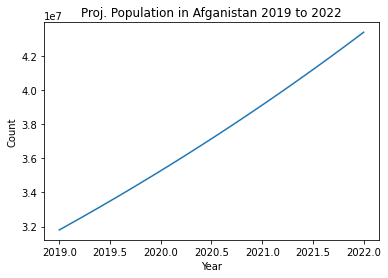

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

P_0 = 31802480
t_0 = 2019
t_1 = 2022

t = np.linspace(t_0,t_1)
P = P_0*np.exp(0.10364*(t-t_0))

plt.plot(t,P)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title("Proj. Population in Afganistan {:4d} to {:4d}".format(t_0,t_1))

### Solução Numérica

Outra maneira de gerar soluções para problemas de estado transiente é pela solução numérica direta das equações diferenciais. Isso exige que configuremos uma função para avaliar numericamente o lado direito da equação diferencial. Essa função, juntamente com as condições iniciais e uma lista de valores de tempo para os quais queremos conhecer a solução, são passadas para um solver que faz o trabalho pesado.

#### Etapa 1. Sete uma função para avaliar o RHS da equação diferencial.

In [4]:
def Inflow(t) : return 0
def Outflow(t): return 0
def Births(P) : return (17.888/1000)*P
def Deaths(P) : return (7.524/1000)*P

def Accumulation(P,t) : return Inflow(t) - Outflow(t) + Births(P) - Deaths(P)

#### Etapa 2. Estabeleça a condição inicial e os valores de tempo para uma solução desejada.

In [5]:
P_0 = 31802480
t_0 = 2019
t_1 = 2022
t = np.linspace(t_0,t_1)

#### Etapa 3. Passe essas informações para um solver para calcular os valores da solução.

O pacote `SciPy` fornece uma série de ferramentas para a solução numérica de equações diferenciais. Destes, talvez o mais fácil de usar seja o `odeint` que é demonstrado aqui. `odeint` precisa ser importado de `scipy.integrate` e, em seguida, receber três informações:

1. Uma função que recebe dois argumentos. O primeiro argumento é o valor da quantidade que estamos tentando integrar e o segundo é o tempo. A função deve retornar o valor do lado direito das equações diferenciais.
2. O valor inicial da quantidade que estamos tentando integrar.
3. Uma lista de momentos em que desejamos avaliar a solução. O primeiro valor na lista deve ser o valor inicial de tempo.

In [6]:
P = odeint(Accumulation,P_0,t)

#### Etapa 4: Plote o resultado

Text(0.5, 1.0, 'Afghanistan')

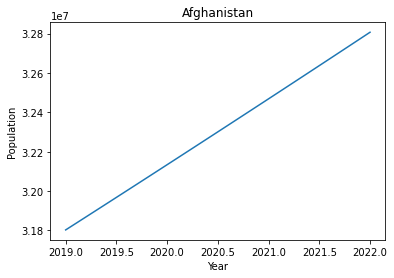

In [7]:
plt.plot(t,P)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Afghanistan')

## Exemplo 2: Diluição de um Traço (marcador) Contaminante

Temos um tanque parcialmente cheio com um volume inicial V(t<sub>0</sub>) = 1000 litros de água que está contaminada por uma espécie tóxica $X$ em uma concentração C<sub>X</sub>(t< sub>0</sub>) = 100 ppm por volume. Desejamos diluir isso para 20 ppm por volume antes de enviá-lo para limpeza adicional. Sabemos que adicionar 4.000 litros de água atingiria a meta, mas para fins de monitoramento do processo, gostaríamos de calcular a concentração em função do tempo, assumindo que a água entra a uma taxa constante de q(t) = 1 litro/segundo.

A quantidade total de $X$ no tanque é o produto da concentração pelo volume, que é C<sub>X</sub>V. O balanço material para $X$ é

Para o componente X: $\underbrace{\mbox{Accumulation}_X}_{\frac{d(C_XV)}{dt}} = \underbrace{\mbox{Inflow}_X}_{=0} - \underbrace{\mbox{Outflow}_X}_{=0} + \underbrace{\mbox{Generation}_X}_{=0} - \underbrace{\mbox{Consumption}_X}_{=0}$

Este é um sistema de dois componentes, então precisamos de dois balanços materiais. Faremos o segundo balanço no volume total assumindo que a densidade é uma constante nesta solução diluída. O saldo geral é

Para o volume total: $\underbrace{\mbox{Acumulação}}_{\frac{dV}{dt}} = \underbrace{\mbox{Inflow}}_{=q} - \underbrace{\mbox{Outflow}} _{=0} + \underbrace{\mbox{Generation}}_{=0} - \underbrace{\mbox{Consumption}}_{=0}$

Isso nos dá um par de equações diferenciais

$\begin{align*}
\frac{d(C_XV)}{dt} & = 0 \\
\frac{dV}{dt} & = q
\end{align*}$

O que estamos procurando é C<sub>X</sub>. Mas o que temos são equações diferenciais para produto (C<sub>X</sub>V) e volume V. Como podemos obter uma equação diferencial para C<sub>X</sub>?

Usando a regra da cadeia

$\frac{d(C_XV)}{dt} = C_X\,\underbrace{\frac{dV}{dt}}_{=q} + V\,\frac{dC_X}{dt} = 0$

Substituindo na segunda equação nos deixa com um par de equações diferenciais

$\begin{align*}
\frac{dC_X}{dt} & = -\frac{q}{V} C_X \\
\frac{dV}{dt} & = q
\end{align*}$

Text(0.5, 1.0, 'Concentration of X')

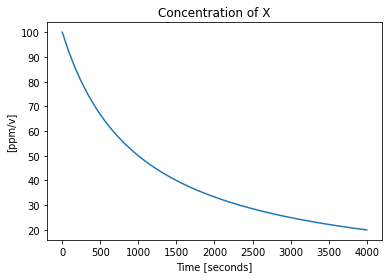

In [8]:
# parameter values
q = 1          # liters/second

# initial conditions
C_0 = 100      # ppm
V_0 = 1000     # liters

# time grid in seconds
t = np.linspace(0,4000)

# compute list of derivative values
def deriv(X,t):
    C,V = X
    return [-q*C/V,q]

# solve with odeint
soln = odeint(deriv,[C_0,V_0],t)

# display the result
plt.plot(t,soln[:,0])
plt.xlabel('Time [seconds]')
plt.ylabel('[ppm/v]')
plt.title('Concentration of X')